# BME-230A: Homework 1 Part A

Your assignment for homework 1A is to redo the linear regression analysis, but using a different classification method from SKLearn. 

Copy this notebook and complete the homework as an IPython notebook. Submit the notebook file to Canvas to complete the homework.

Use the same dataset:
https://drive.google.com/file/d/1FZbQCEHr2Rie4cXSM6Udg0SaWTtPnEHO/view?usp=sharing

Goals and Requirements:
1. Select a classification method from [SKLearn](http://scikit-learn.org/):
    * We recommend logistic regression or any forest method as they are fairly intuitive. 

2. Write a short explanation of the method and how it works (look for explanations in documention, youtube, or online).

3. Try to achieve the highest accuracy / estimator quality.

*Notes*:

Use a reasonable train/test split of 80%/20% or even 70%/30% to avoid too much variance in your estimate of accuracy, FPR and TPR. 

## Logistic Regression Model
The method I chose is the Logistic Regression Model. Given a set of X factors
\begin{equation}
  x = (x_1, x_2, x_3, \dots , x_n)
\end{equation}
  We can write the following linear equation below
\begin{equation}
  w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n =  w^T_x
\end{equation}
Where $ w_0 $ is the intercept, alot like the $b$ used in linear regression.

#### The Challenges of the Linear Model
Because the model we just created is surrounded by the idea of a best fit line. Its range (y values) is unlimited. However, probablities can only be between 0 to 1, so the model fails. 

### Logit Style
So 2 problems arose from the linear model 


*   The predicted values $y'$ can exceed 1.
*   The values of $y'$ can be negative.

They can be fixed using the logit function
\begin{equation}
y' = ln(\frac{p}{1 - p})
\end{equation}

This obtained by shaping the linear model in an $e$ function to first eliminate the existance of negative probabilites in the model

\begin{equation}
p = e^{w^T_x}
\end{equation}

And then limiting it to 0 and 1 by dividing it by something bigger.

\begin{equation}
p = \frac{e^{w^T_x}}{e^{w^T_x} + 1}
\end{equation}

This ensures that if $w^T_x$ is large, $p$ will be essentially 1 and when $w^T_x$ is small, $p$ will essentially be 0. Allowing us to create a classification model with both continuous and discrete variables.


# Your Code

Below include your code

First block below authenticates the user and gets the data set.

In [0]:
# get PyDrive
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Now proxy the Google Drive file to a local file
cancer_data_import = drive.CreateFile({'id':'1FZbQCEHr2Rie4cXSM6Udg0SaWTtPnEHO'}) 
# this id is used to find the file, if you look at the google drive URL
# you'll notice the id is the same after the  https://drive.google.com/file/d/ part of the URL
cancer_data_import.GetContentFile('cancer_data.csv') # 'cancer_data.csv' is the file name that will be accessible in the notebook.

In [5]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import accuracy_score

# read the file to begin with
dataset = pd.read_csv('cancer_data.csv')  

# set up the data and fit to transformation.
for column in dataset:
  dataset[column] = preprocessing.LabelEncoder().fit_transform(dataset[column])

inputX = dataset[['uniformity-of-cell-size', 'uniformity-of-cell-shape']]
inputY = dataset['class']

LogRegModel = linear_model.LogisticRegression(random_state=0)
LogRegModel.fit(inputX, inputY)
print("score:{}".format(round(LogRegModel.score(inputX, inputY), 6)))

score:0.945637


I chose the the above inputs based on scoring each column done below using the LogisticRegression class from the linear_model extension of sklearn.

In [6]:
columns = list(dataset.keys())
columns.remove('id')
columns.remove('class')

# lets see which variable is the most effective

for column in columns:
  X = dataset[[column]]
  Y = dataset['class']
  LogRegModel = linear_model.LogisticRegression(random_state= 0)
  LogRegModel.fit(X, Y)
  print("{}\t{}".format(column, LogRegModel.score(X, Y)))


clump-thickness	0.861230329041
uniformity-of-cell-size	0.927038626609
uniformity-of-cell-shape	0.922746781116
marginal-adhesion	0.864091559371
single-epithelial-cell-size	0.875536480687
bare-nuclei	0.713876967096
bland-chromatin	0.907010014306
normal-nucleoli	0.8669527897
mitoses	0.789699570815


# Classification
Create training/test splits and train the classifier. Report the accuracy, FPR and TPR.

### Finding a Threshold
First the data is graphed to find the ideal threshold to test with. Besed on the graph, I chose 0.1 as my threshold to decide whether something is benign or malignant. 

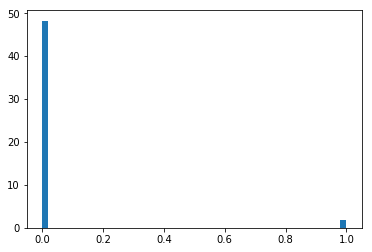

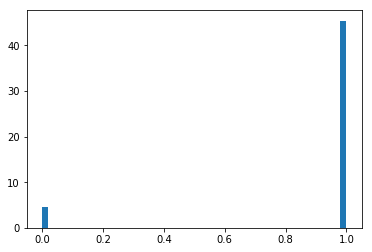

accuracy: 0.945637


In [30]:
import matplotlib.pyplot as plt

# make the flase vs true datasets
falseCase = dataset.loc[dataset['class'] == 0]
trueCase = dataset.loc[dataset['class'] == 1]

# false test
falseY = falseCase['class']
falseX = falseCase[['uniformity-of-cell-size', 'uniformity-of-cell-shape']]
LogRegModel.fit(inputX, inputY)
falseInferences = LogRegModel.predict(falseX)

flaseN, falseBin, falsePatches = plt.hist(falseInferences, bins=50, normed=1, cumulative=0)
plt.show()

# true test
trueY = trueCase['class']
trueX = trueCase[['uniformity-of-cell-size', 'uniformity-of-cell-shape']]
trueInferences = LogRegModel.predict(trueX)

trueN, trueBin, truePatches = plt.hist(trueInferences, bins=50, normed=1, cumulative=0)
plt.show()


# classification test

# the accuracy scores are so high as is no cutoff really changes the outcomes.
yHat = LogRegModel.predict(inputX)
yHatClassification = [1 if p > 0.25 else 0 for p in yHat]
print("accuracy: {}".format(round(accuracy_score(inputY, yHatClassification), 6)))


score: 0.940966010733


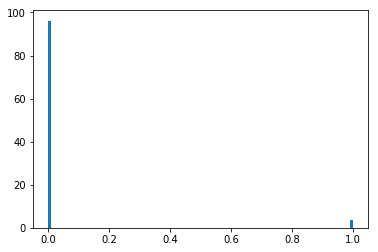

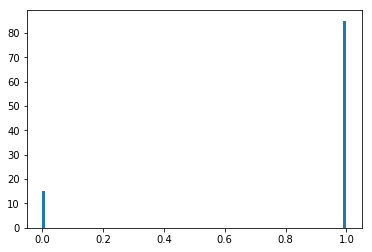

Test Score: 0.964285714286


In [43]:
# split into train and test data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

(trainSet,testSet) = train_test_split(dataset, test_size=0.2)

trainY = trainSet['class']
trainX = trainSet[['uniformity-of-cell-shape','uniformity-of-cell-size']]

testY = testSet['class']
testX = testSet[['uniformity-of-cell-shape','uniformity-of-cell-size']]

LogRegModel.fit(trainX, trainY)
print("Train Score: {}".format(LogRegModel.score(trainX, trainY)))


# finding the threshold
inputBenign = trainSet.loc[trainSet['class'] == 0]
benignY = inputBenign['class']
benignX = inputBenign[['uniformity-of-cell-shape', 'uniformity-of-cell-size']]
LogRegModel.fit(inputX, inputY)
predsBenign = LogRegModel.predict(benignX)

N, bins, patches = plt.hist(predsBenign, bins=100, normed=1, cumulative=0)
plt.show()

inputMgn = trainSet.loc[trainSet['class'] == 1]
malY = inputMgn['class']
malX = inputMgn[['uniformity-of-cell-size','uniformity-of-cell-size']]
predsMgn = LogRegModel.predict(malX)

N, bins, patches = plt.hist(predsMgn, bins=100, normed=1, cumulative=0)
plt.show()

testPredict = LogRegModel.predict(testX)
testPredict = [1 if p > 0.1 else 0 for p in testPredict]
print("Test Score: {}".format(accuracy_score(testY, testPredict)))

# Questions
What feature contributes most to the prediction? How can we tell?

Two features have the largest impact to the prediction and they are uniformity of cell size and uniformity of cell shape, each have an accuracy of above 92.2%. We can tell by runing .score on every column (excluding id and class) to predict for class if it is 1 malignant or 0 benign.

Explain in your own words the difference between regression and classification methods.

Both regression and classification are types of supervised machine learning. However, the main difference is that regression has a conitnous range of output from 0 ot 1 (probabilities) as classification is a more discrete output of 0 or 1 (a yes or no). Because class is a more discreet value, the regression output from the Logistic regression model needed a cutoff to create a more discreet yes or no values. 

Is it best to use all the features or exclude some? Why?

No, because some features may have a lower score. Which could affect the accuracy of the classification. 